In [0]:
#https://www.alphavantage.co/support/#api-key
#5 requests per minute
#500 requests per day

In [5]:
!pip install alpha_vantage

In [0]:
from alpha_vantage.timeseries import TimeSeries
# Your key here
empty = pd.DataFrame()
def download_stock(tag):
  key = 'your key'
  ts = TimeSeries(key)
  stock, meta = ts.get_daily(symbol=tag, outputsize='full')
  return stock, meta

In [0]:
import pandas as pd
import time

def stock(tag, df_to_add):
  df_, _ = download_stock(tag)
  df_ = pd.DataFrame(df_)
  df_ = df_.transpose()
  df_ = df_.loc['2020-05-22':'2019-04-22']
  df_ = df_['1. open']
  df_ = pd.DataFrame(df_)
  df_.columns = [tag]
  df_ = df_[tag].values.astype(float)
  df_ = pd.concat([df_to_add, pd.DataFrame(df_)], axis=1)
  return df_

def get_index(tag):
  df_, _ = download_stock(tag)
  df_ = pd.DataFrame(df_)
  df_ = df_.transpose()
  df_ = df_.loc['2020-05-22':'2019-04-22']
  df_ = df_['1. open']
  df_ = pd.DataFrame(df_)

  #extract index and return it as series
  df_ = df_.reset_index()
  return df_['index']

##Stock Downloader

In [0]:
#se lo volgiamo in più tranches, invece di utilizzare timers lo spezziamo
tag_list = ['AAPL', 'ABBV', 'GOOG', 'NFLX', 'MDLZ', 'FANG', 'VAR', 'UPS', 'UDR']

In [0]:
#index
index = get_index(tag_list[0])
index = pd.DataFrame(index) #conta come 1 richiesta

#csv of stocks
df = pd.DataFrame()

In [47]:
#csv of remaining stocks
df = stock(tag_list[0], empty) #solo per la prima si utilizza empty
for k in range(1, len(tag_list)):
  print(k, tag_list[k])
  df = stock(tag_list[k], df)
  if k%4 == 0:
    time.sleep(70)

ABBV
GOOG
NFLX
MDLZ
FANG
VAR
UPS
UDR


In [0]:
df1 = df.copy()

In [50]:
#rename columns
df1.columns = tag_list
df1

,AAPL,ABBV,GOOG,NFLX,MDLZ,FANG,VAR,UPS,UDR
0,315.77,92.87,1396.71,437.0000,49.0300,42.57,115.88,96.79,35.85
1,318.66,91.28,1408.00,448.5600,49.6100,43.63,119.24,96.73,36.05
2,316.68,92.13,1389.58,454.2500,50.0400,42.79,117.21,97.50,36.43
3,315.03,91.26,1387.00,453.3965,51.0000,43.77,118.78,95.93,36.81
4,313.17,92.00,1361.75,451.1600,50.7361,41.71,116.86,93.33,36.24
...,...,...,...,...,...,...,...,...,...
271,204.90,79.67,1269.00,368.3500,50.1300,108.69,134.77,104.91,44.98
272,206.83,80.05,1264.77,374.4900,49.9200,111.12,129.27,109.59,44.43
273,207.36,79.23,1264.12,381.0700,50.3600,112.36,132.77,113.60,44.54
274,204.43,78.15,1250.69,375.4500,50.1700,111.20,130.90,113.34,43.72


In [51]:
#reattach index
total = pd.concat([index, df1], axis=1)
total = total.set_index('index')
total

,AAPL,ABBV,GOOG,NFLX,MDLZ,FANG,VAR,UPS,UDR
index,,,,,,,,,
2020-05-22,315.77,92.87,1396.71,437.0000,49.0300,42.57,115.88,96.79,35.85
2020-05-21,318.66,91.28,1408.00,448.5600,49.6100,43.63,119.24,96.73,36.05
2020-05-20,316.68,92.13,1389.58,454.2500,50.0400,42.79,117.21,97.50,36.43
2020-05-19,315.03,91.26,1387.00,453.3965,51.0000,43.77,118.78,95.93,36.81
2020-05-18,313.17,92.00,1361.75,451.1600,50.7361,41.71,116.86,93.33,36.24
...,...,...,...,...,...,...,...,...,...
2019-04-26,204.90,79.67,1269.00,368.3500,50.1300,108.69,134.77,104.91,44.98
2019-04-25,206.83,80.05,1264.77,374.4900,49.9200,111.12,129.27,109.59,44.43
2019-04-24,207.36,79.23,1264.12,381.0700,50.3600,112.36,132.77,113.60,44.54


##Predictive Power Score

In [52]:
!pip install ppscore
import ppscore as pps
#pps.score(df, "feature_column", "target_column")
pps.matrix(total)

,AAPL,ABBV,GOOG,NFLX,MDLZ,FANG,VAR,UPS,UDR
AAPL,1.000000,0.450166,0.566752,0.071596,0.000000,0.415166,0.207526,0.005009,0.000000
ABBV,0.387707,1.000000,0.387389,0.000000,0.000000,0.189796,0.030167,0.000000,0.000000
GOOG,0.520067,0.394409,1.000000,0.000000,0.000000,0.262361,0.208377,0.000000,0.000000
NFLX,0.018386,0.000000,0.015589,1.000000,0.000000,0.233313,0.000000,0.262510,0.102351
MDLZ,0.000000,0.000000,0.000000,0.000000,1.000000,0.139918,0.000000,0.000000,0.129828
FANG,0.185127,0.000000,0.032679,0.066656,0.194973,1.000000,0.000000,0.098511,0.446927
VAR,0.038410,0.036639,0.191579,0.100302,0.000000,0.168137,1.000000,0.029884,0.010901
UPS,0.076038,0.000000,0.213716,0.446255,0.116374,0.438289,0.000000,1.000000,0.214382
UDR,0.000000,0.000000,0.000000,0.139933,0.178574,0.438495,0.000000,0.004375,1.000000


##Correlation Matrix

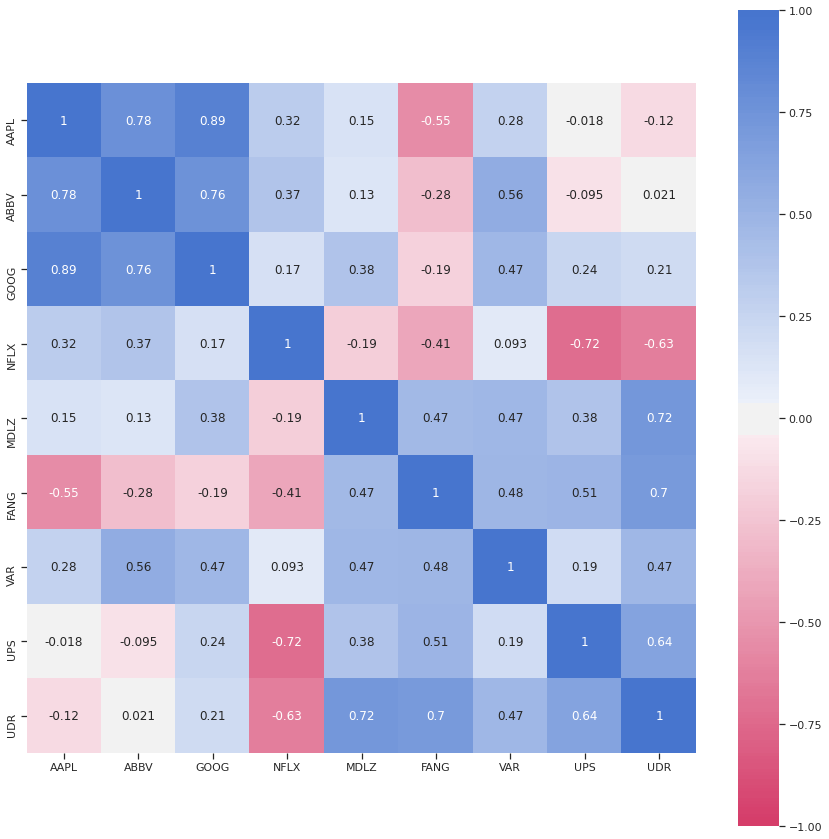

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = total.corr()
fig, ax = plt.subplots(figsize=(15,15))
#If you want to Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
#ax.set_facecolor((.21875, .21875, .21875))
#I choose not to because I can see the strength of the correlation across all variables
ax = sns.heatmap(
corr,
#mask=mask,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(0, 256, n=200),
square=True,
ax=ax,
annot=True
)

In [15]:
#single correlation
import numpy as np
print(np.corrcoef(total['GOOG'], total['AAPL']))

[[1.         0.88737511]
 [0.88737511 1.        ]]


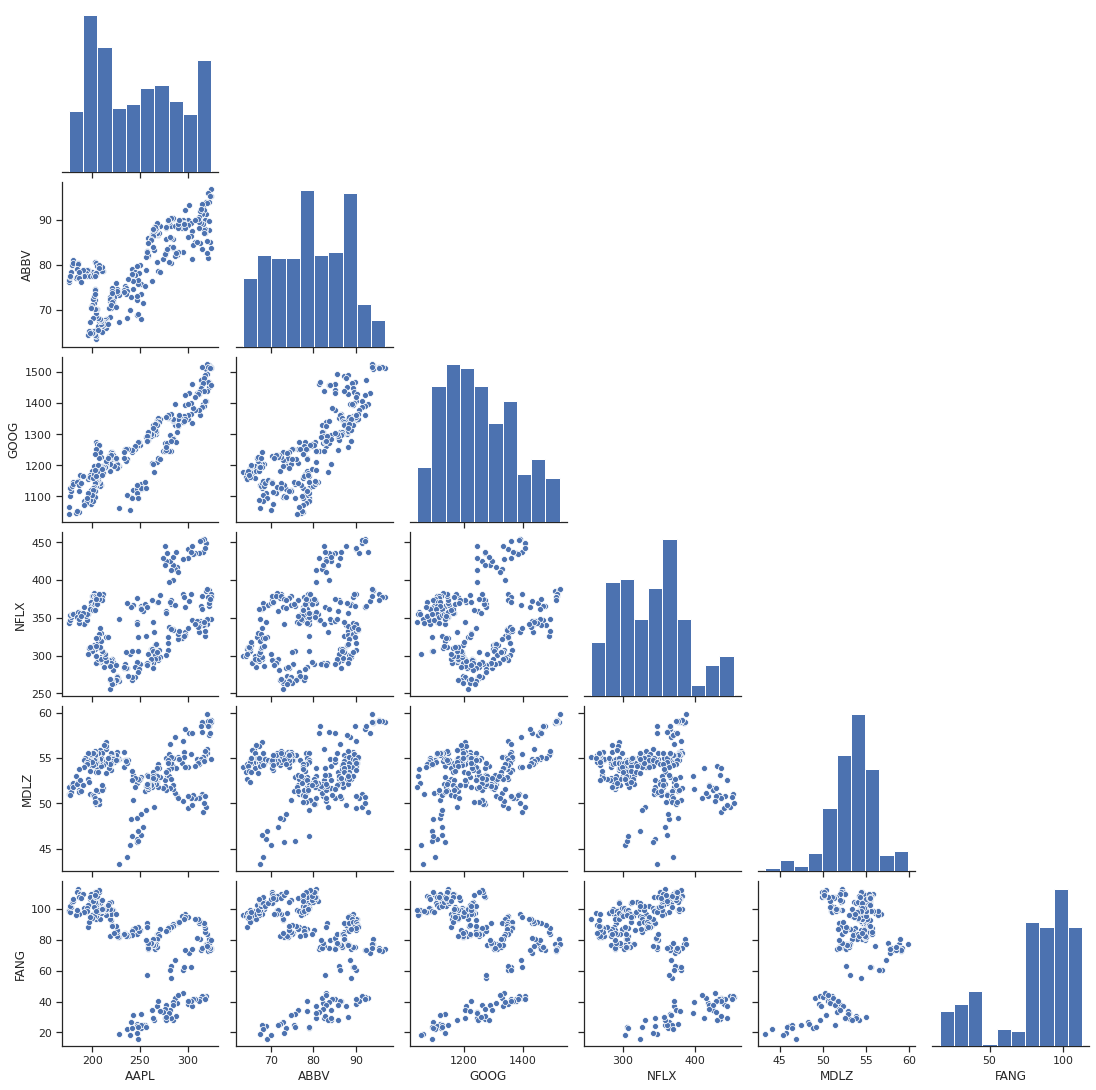

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(total, corner=True)
#sono automatically scaled
#plt.show()

In [0]:
fig, ax = plt.subplots(figsize=(15,15))
#max 6 plots, otherwise runs error: These `style` levels are missing dashes: {
sns.lineplot(data=total)